# Forecasting materauto BL3 for next 365 days

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# The indexed data
df = pd.read_csv("materauto_item_indexed.csv")

In [235]:
# Add the prophet format columns
df['ds'] = df['datetime']
df['y'] = df['BL3']

# Convert to ds datetime
df['ds'] = pd.to_datetime(df['ds'])
df = df.drop( 'datetime', axis=1).drop( 'BL3', axis=1).set_index('ds')

# Resample the dataset to daily
df = df.resample('D').ffill()


In [236]:
def plot_data(col):
    plt.figure(figsize=(17,8))
    plt.plot(df[col])
    plt.xlabel('ds')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()

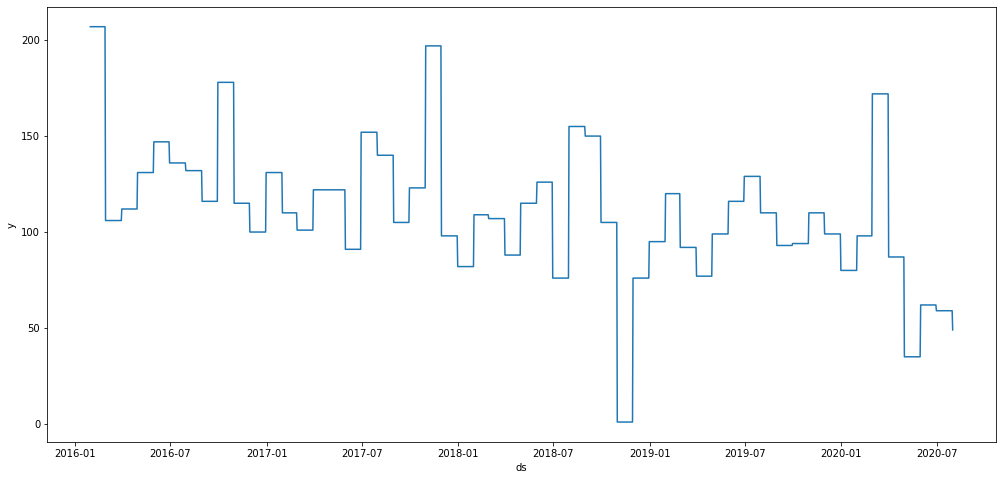

In [237]:
for col in df.columns:
    if col == 'y':
        plot_data(col)

In [238]:
from fbprophet import Prophet 

In [239]:
# Reset the index before you use prophet
df = df.reset_index()

In [240]:
# Prediction size to by one year
prediciton_size = 365

In [241]:
train_df = df[:-prediction_size]

# Train a prophet model and make predictions with it
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediciton_size)
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-31,143.081094,108.543242,183.743577,143.081094,143.081094,2.088875,2.088875,2.088875,0.527889,0.527889,0.527889,1.560986,1.560986,1.560986,0.0,0.0,0.0,145.169969
1,2016-02-01,143.022748,108.207319,181.946009,143.022748,143.022748,3.363072,3.363072,3.363072,-0.004070,-0.004070,-0.004070,3.367142,3.367142,3.367142,0.0,0.0,0.0,146.385820
2,2016-02-02,142.964402,112.136738,183.047261,142.964402,142.964402,5.425559,5.425559,5.425559,0.256779,0.256779,0.256779,5.168780,5.168780,5.168780,0.0,0.0,0.0,148.389961
3,2016-02-03,142.906056,111.210434,187.629151,142.906056,142.906056,6.530779,6.530779,6.530779,-0.408029,-0.408029,-0.408029,6.938808,6.938808,6.938808,0.0,0.0,0.0,149.436834
4,2016-02-04,142.847709,110.505962,188.479880,142.847709,142.847709,7.706836,7.706836,7.706836,-0.943409,-0.943409,-0.943409,8.650245,8.650245,8.650245,0.0,0.0,0.0,150.554545


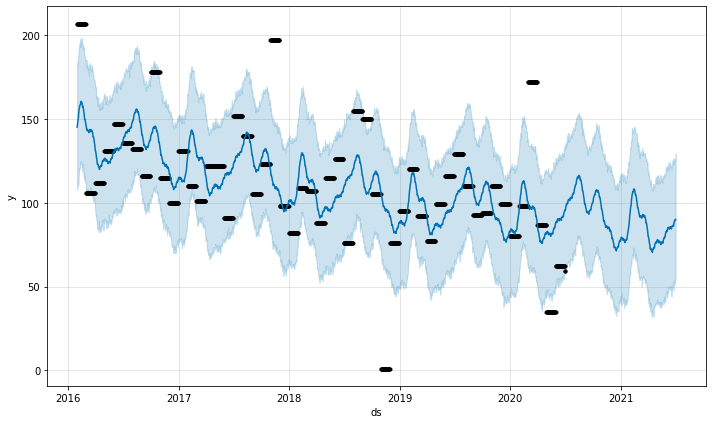

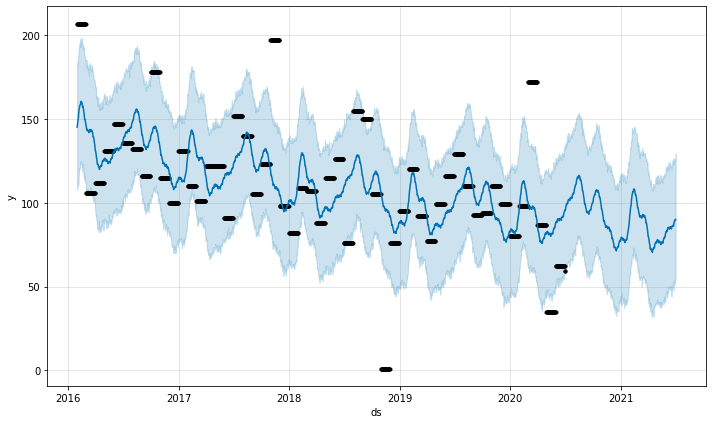

In [242]:
m.plot(forecast)

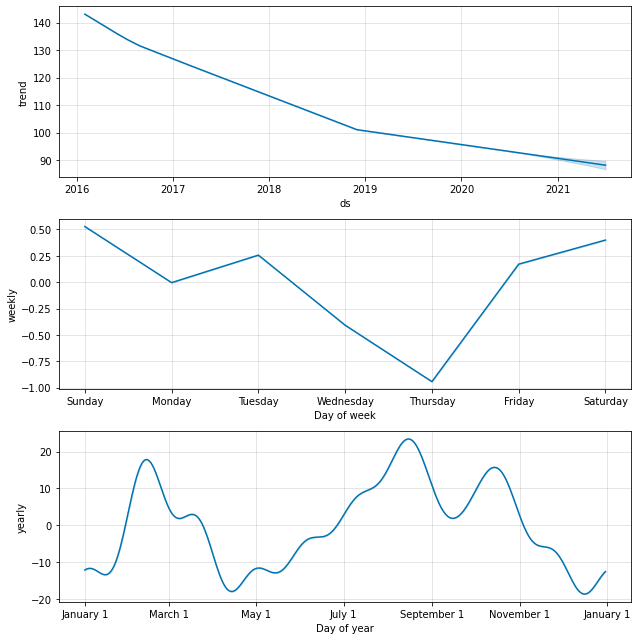

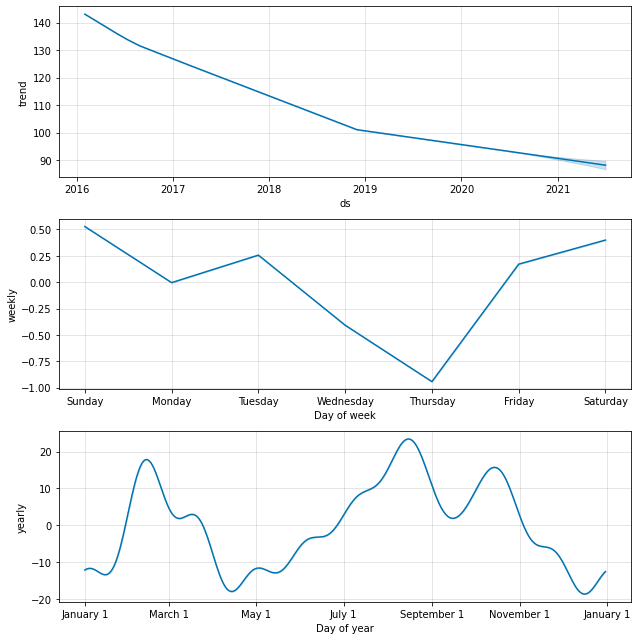

In [243]:
m.plot_components(forecast)

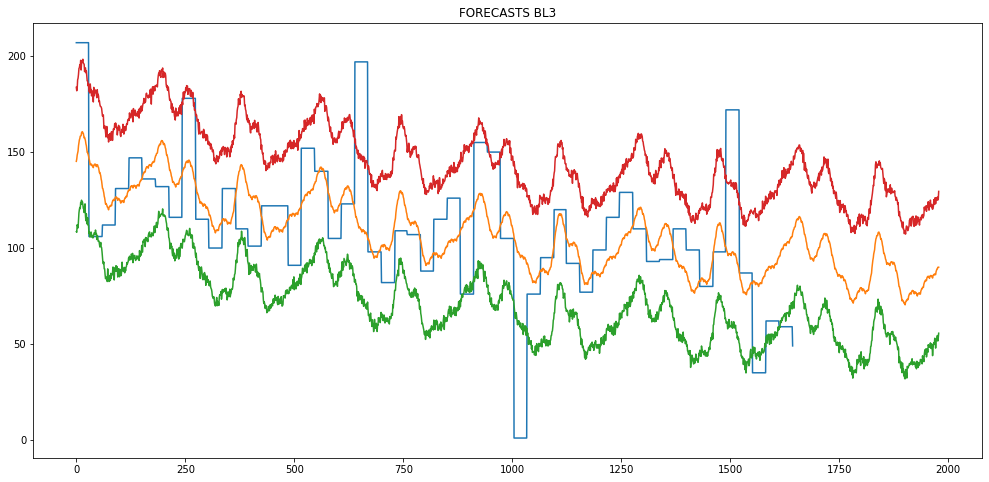

In [244]:
plt.figure(figsize=(17,8))
plt.title('FORECASTS BL3')
plt.plot(df['y'])
plt.plot(forecast['yhat'])
plt.plot(forecast['yhat_lower'])
plt.plot(forecast['yhat_upper'])